In [1]:
from AnchorToConcrete import *

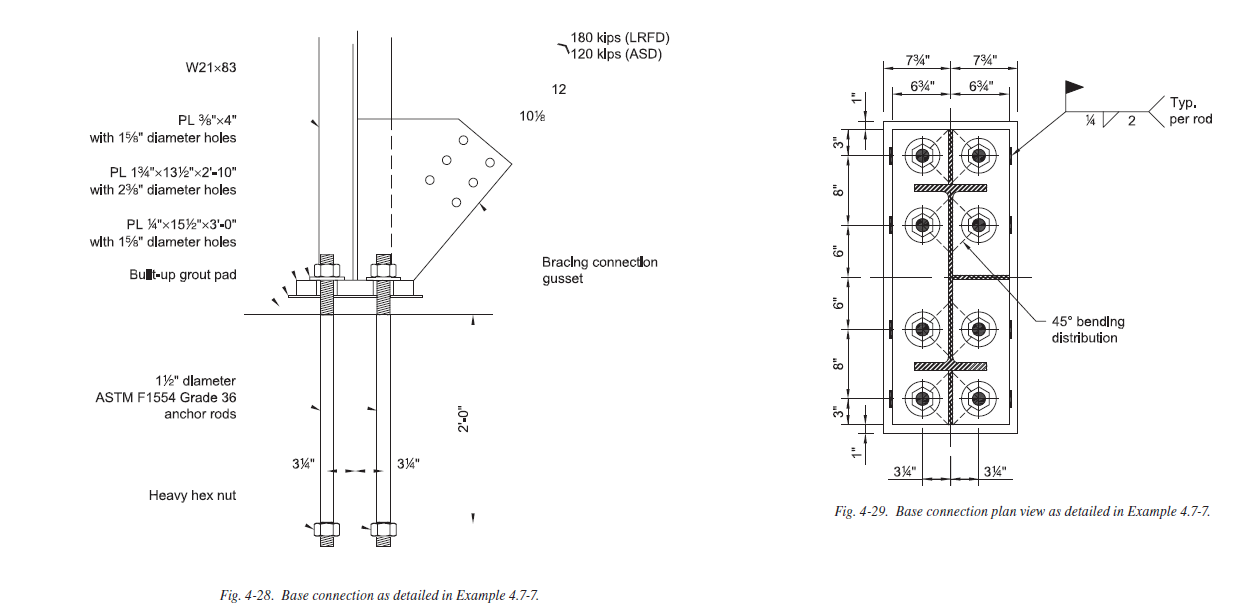

# EXAMPLE 4.7-7— Base Connection at Brace Producing Combined Tension and Shear

An exposed base connection is designed in this example that considers shear transfer through a welded setting plate to preclude
anchor rod bending. The concrete anchorage capacity is confirmed using ACI 318.

### Given:
A base connection for a W21×83 column is subjected to wind forces from a tension-only brace as illustrated in Figure 4-28. The
base plate plan view is shown in Figure 4-29. Determine the anchorage requirements and confirm the capacity of the base plate
and column-to-base plate weld. The connection is located away from any concrete edges. The concrete compressive strength, ƒc′,
is 5,000 psi. The plate is ASTM A572/A572M Grade 50, and anchor rods are ASTM F1554 Grade 36 material.

### Base plate
ASTM A572/A572M Grade 50\n
Fy = 50 ksi
Fu = 65 ksi
### Anchor rods
ASTM F1554 Grade 36
Fy = 36 ksi
Fu = 58 ksi

* 1 in   = 25.4 mm
* 1 psi  = 0.00689476 N/mm2
* 1 kips = 4448.22 N
* 1 ksi  = 6.8947 MPa


In [2]:
inc  = 25.4 #mm
psi  = 0.00689476 #N/mm^2
kips = 4448.22 #N
ksi  = 6.89476 #N/mm^2

### VARIABLES

In [3]:
# BASE PLATE
Fpy = 50 * ksi
Fpu = 60 * ksi

# ANCHOR RODS
Fay = 36 * ksi
Fau = 58 * ksi
d_a = 1.5 * inc

# OTHER VARIABLES
Anc_x = 6.5 * inc
Anc_y = 28  * inc
Cax1  = 100 * inc
Cax2  = 100 * inc
Cay1  = 100 * inc
Cay2  = 100 * inc
h_ef  = 2*12* inc
f_c   = 5000 * psi
n = 8
nt = 6              #Design Guide Table-4.1 number of threads
fi_breakout  = 0.7  #Because no supplementary reinforcement was specified, ACI 318, Table 17.5.3(b)
fi_pullout   = 0.7  #ACI 318, Table 17.5.3(c)
fi_steelshear = 0.65 # ACI 318, Table 17.5.3(a)
fi_pryoutshear = 0.7 # ACI 318, Table 17.5.3(c)

Abrg  = 3.12 * inc**2 #Design Guide Table-4.2
 # FORCES
Vu = 116 * kips
Nu = 138 * kips
# Standart delikler ve kesmede etkin olabilecek şekilde ankrajlar beton kenarına yakın olmadığından kesme kuvveti ankrajlar arasında eşit dağıldığı kabul edilir. Aynı şekilde çekme durumunda da bir eksantrisite olmadığı için çekme kuvvetlerinin ankrajlara eşit dağıldığı kabul edilir.

# ACI318-19 17.5.1.3.1 ankraj aralığı 3*h_ef ten küçük olduğu için tüm ankrajlar grup olarak hareket edileceği düşünülüyor ve n=8 kabul ediliyor.
Vua_i = Vu/n
Nua_i = Nu/n

### CALCULATE BASIC PARAMETERS

In [4]:
h_ef = h_ef_Check(h_ef,Cax1,Cax2,Cay1,Cay2,Anc_x,Anc_y)
print(f"h_ef = {round(h_ef/10**3,3)}m - ({round(h_ef/(25.4),3)}in)")

h_ef = 0.61m - (24.0in)


In [5]:
ANco = A_Nco(h_ef)
print(f"ANco = {round(ANco/10**6,3)}m2 - ({round(ANco/25.4**2,3)}in^2)")

ANco = 3.345m2 - (5184.0in^2)


In [6]:
ANc = A_Nc(Anc_x, Anc_y, h_ef, Cax1, Cax2, Cay1, Cay2,n, TensionRegion=3)
print(f"ANc = {round(ANc/10**6,3)}m2 - ({round(ANc/25.4**2,3)}in^2)")

ANc = 5.065m2 - (7850.0in^2)


### TENSION CHECKS

#### CONCRETE BREAKOUT STRENGTH IN TENSION

In [7]:
BreakoutTension = ConcreteBreakoutStrengthOfAnchorInTension()
    
Nb = BreakoutTension.BasicSingleAnchorBreakoutStrength(kc=16, lambda_a=1, f_c=f_c, h_ef=h_ef)
print(f"Nb = {round(Nb/10**3,3)}kN - ({round(Nb/4448.22,3)}kips)")

psi_ecN = BreakoutTension.Psi_ecN_Get(0.0, h_ef)
print(f"psi_ecN = {psi_ecN}")

psi_edN = BreakoutTension.Psi_edN_Get(Ca_min=Cax1, h_ef=h_ef)
print(f"psi_edN = {psi_edN}")

psi_cN = BreakoutTension.Psi_cN_Get(InstalledType=AnchorInstalledType.Cast_in, IsConcCracked = None)
print(f"psi_cN = {psi_cN}")

psi_cpN = BreakoutTension.Psi_cpN_Get(Cac=Cax1 , Ca_min=Cax1 , h_ef=h_ef, InstalledType=AnchorInstalledType.Cast_in)
print(f"psi_cpN = {psi_cpN}")
Ncbg = BreakoutTension.ForGroupAnchor(A_Nc=ANc, A_Nco=ANco, Psi_ecN=psi_ecN, Psi_edN=psi_edN, Psi_cN=psi_cN,Psi_cpN=psi_cpN, Nb=Nb)
print(f"Ncbg = {round(Ncbg/10**3,3)}kN - ({round(Ncbg/4448.2,3)}kips)")
Design_Ncbg = fi_breakout * Ncbg
print(f"fi_d*Ncbg = {round(Design_Ncbg/10**3,3)}kN - ({round(Design_Ncbg/4448.2,3)}kips)")
print(f"Is concrete breakout strength in tension capacity enough? ==> {Nu < Design_Ncbg} - {round(Nu/1000,3)}kN < {round(Design_Ncbg/1000,3)}kN - ({round(Nu/4448.2,3)}kips < {round(Design_Ncbg/4448.2,3)}kips)")

Nb = 1003.577kN - (225.613kips)
psi_ecN = 1.0
psi_edN = 1.0
psi_cN = 1.0
psi_cpN = 1.0
Ncbg = 1519.692kN - (341.642kips)
fi_d*Ncbg = 1063.784kN - (239.149kips)
Is concrete breakout strength in tension capacity enough? ==> True - 613.854kN < 1063.784kN - (138.001kips < 239.149kips)


#### CONCRETE PULLOUT STRENGTH IN TENSION

In [8]:
PulloutTension = PulloutStrengthInTension()
    
psi_cp = PulloutTension.Psi_cP_Get(IsConcCracked=None)
print(f"psi_cp = {psi_cp}")
    
Np     = PulloutTension.BasicSingleAnchorPulloutStrength(A_brg=Abrg, 
                                                             f_c=f_c, 
                                                             e_h=0.0, 
                                                             d_a=d_a, 
                                                             AnchorType= CastInAnchorType.HexHeadBoltWithWasher, 
                                                             InstalledType= AnchorInstalledType.Cast_in)
print(f"Np = {round(Np/10**3,3)}kN - ({round(Np/4448.2,3)}kips)")
    
Npn = PulloutTension.SingleAnchorNominalPulloutStrength(Psi_cP=psi_cp, Np=Np)
print(f"Npn = {round(Npn/10**3,3)}kN - ({round(Npn/4448.2,3)}kips)")

Design_Npn = fi_pullout * Npn
print(f"fi_d*Ncbg = {round(Design_Npn/10**3,3)}kN - ({round(Design_Npn/4448.2,3)}kips)")

print(f"Is concrete pullout strength in tension capacity enough? ==> {Nua_i < Design_Npn} - {Nua_i/1000}kN < {Design_Npn/1000}kN - ({round(Nua_i/4448.2,3)}kips < {round(Design_Npn/4448.2,3)}kips)")


psi_cp = 1.0
Np = 555.138kN - (124.801kips)
Npn = 555.138kN - (124.801kips)
fi_d*Ncbg = 388.597kN - (87.36kips)
Is concrete pullout strength in tension capacity enough? ==> True - 76.731795kN < 388.5967932kN - (17.25kips < 87.36kips)


#### CONCRETE SIDE-FACE BLOWOUT STRENGTH IN TENSION

In [9]:
print("Determine the concrete side-face blowout strength in tension of the anchor group The available concrete side-face blowout strength in tension of the anchor group is determined according to ACI 318, Section 17.6.4. Because there are no cases with anchor rods close to an edge (hef > 2.5ca1), side-face blowout is not applicable.")

Determine the concrete side-face blowout strength in tension of the anchor group The available concrete side-face blowout strength in tension of the anchor group is determined according to ACI 318, Section 17.6.4. Because there are no cases with anchor rods close to an edge (hef > 2.5ca1), side-face blowout is not applicable.


### SHEAR CHECKS

#### AVAILABLE STEEL STRENGTH IN SHEAR

In [10]:
steelStrengthShear = SteelStrengthOfAnchorInShear()
    
Asev = steelStrengthShear.A_seV(d_a=d_a, n_t=nt)
print(f"A_seV = {round(Asev,3)}mm2 - ({round(Asev/25.4**2,3)}in^2)")

# Design guide örneğinde efektif ankrajın çekme alanı alınmış(DG01-Table-4.1 A_seN) ACI da önerilen formül nominal alana yakın sonuç veriyor.(ACI318-19 - R17.7.1.2)
Vsa = steelStrengthShear.NominalSteelStrengthCastInHeadedAndHookedBoltAnchorInShear(A_seV=1.41*25.4**2, f_ya=Fay, f_uta= Fau)
print(f"Vsa = {round(Vsa/10**3,3)}kN - ({round(Vsa/4448.2,3)}kips)")

Design_Vsa = fi_steelshear * Vsa
print(f"fi*Vsa = {round(Design_Vsa/10**3,3)}kN - ({round(Design_Vsa/4448.2,3)}kips)")
    
print(f"Is available steel strength in shear capacity enough? ==> {Vua_i < Design_Vsa} - {Vua_i/1000}kN < {Design_Vsa/1000}kN - ({round(Vua_i/4448.2,3)}kips < {round(Design_Vsa/4448.2,3)}kips)")

A_seV = 1129.82mm2 - (1.751in^2)
Vsa = 174.612kN - (39.255kips)
fi*Vsa = 113.498kN - (25.515kips)
Is available steel strength in shear capacity enough? ==> True - 64.49919kN < 113.49802035kN - (14.5kips < 25.515kips)


#### CONCRETE BREAKOUT STRENGTH IN SHEAR

In [11]:
BreakoutShear = ConcreteBreakoutStrengthOfAnchorInShear()
print("Because there are no edges adjacent to the base connection, the available concrete breakout strength in shear is not applicable.")

Because there are no edges adjacent to the base connection, the available concrete breakout strength in shear is not applicable.


#### CONCRETE PRYOUT STRENGTH IN SHEAR

In [12]:
PryShear = ConcretePryoutStrengthOfAnchorInShear()

Ncpg = Ncbg
    
Vcpg = PryShear.GroupAnchorConcPryoutStrengthInShear(h_ef=h_ef, N_cpg=Ncpg)
print(f"Vcpg = {round(Vcpg/10**3,3)}kN - ({round(Vcpg/4448.2,3)}kips)")

Design_Vcpg = fi_pryoutshear * Vcpg
print(f"fi*Vsa = {round(Design_Vcpg/10**3,3)}kN - ({round(Design_Vcpg/4448.2,3)}kips)")
    
print(f"Is available pryout strength in shear capacity enough? ==> {Vu < Design_Vcpg} - {Vu/1000}kN < {Design_Vcpg/1000}kN - ({round(Vu/4448.2,3)}kips < {round(Design_Vcpg/4448.2,3)}kips)")

Vcpg = 3039.383kN - (683.284kips)
fi*Vsa = 2127.568kN - (478.299kips)
Is available pryout strength in shear capacity enough? ==> True - 515.99352kN < 2127.568163kN - (116.001kips < 478.299kips)
